In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- There are 17% to get revenue-True Give the day is a weekend and There are 83% to get revenue-True Give the day is a weekday.
- There are 12% the day is a weekend given that the revenue is true, and There are 55% the day is a weekday given that the revenue is True.

P(revenue | weekend) = 0.174       P(revenue | weekday) = 0.826
P(weekend | revenue) = 0.116       P(weekday | revenue) = 0.550


<Figure size 640x480 with 0 Axes>

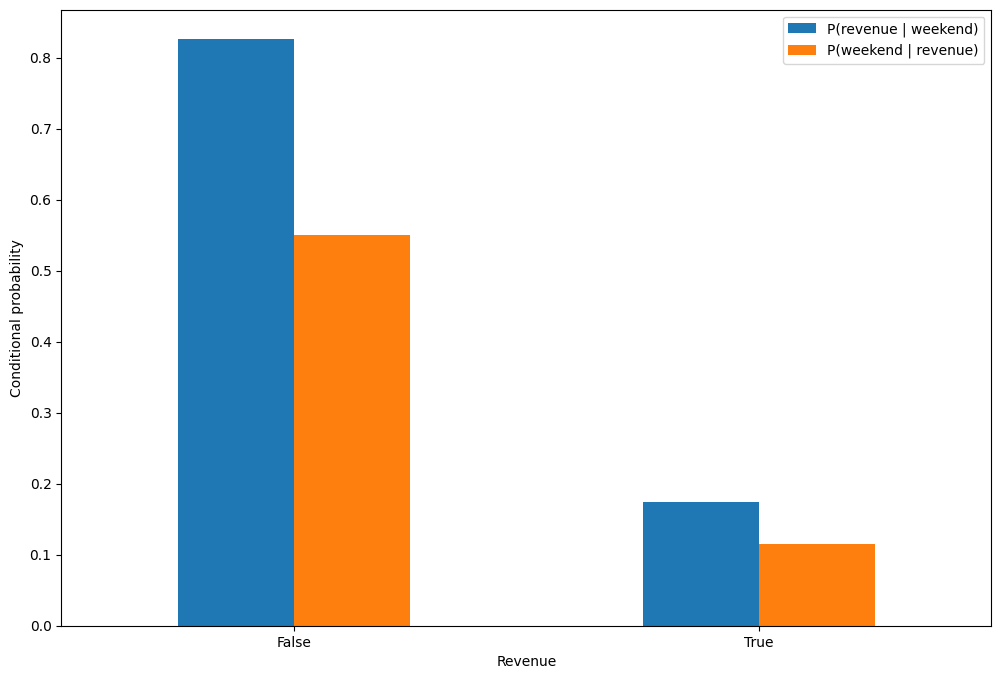

In [3]:
# compute probabilities of being weekend
weekend_prob = df["Weekend"].value_counts(normalize=True)[True]

#create mask for weekend and revenues
weekend_mask = df["Weekend"] == True

total_entries = df.shape[0]
revenue_weekend_prob = df["Revenue"][weekend_mask].value_counts() / total_entries

# compute conditional probabilities
cond_prob = pd.DataFrame()
cond_prob["P(revenue | weekend)"] = revenue_weekend_prob / weekend_prob


print(f"P(revenue | weekend) = {cond_prob.loc[1].values[0]:.3f} \
      P(revenue | weekday) = {cond_prob.loc[0].values[0]:.3f}")

revenue = df['Revenue'].value_counts(normalize=True)[True]

cond_prob["P(weekend | revenue)"] = (cond_prob["P(revenue | weekend)"] * revenue) / (weekend_prob)

print(f"P(weekend | revenue) = {cond_prob['P(weekend | revenue)'].loc[1]:.3f} \
      P(weekday | revenue) = {cond_prob['P(weekend | revenue)'].loc[0]:.3f}")

# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(12,8), rot=0)
ax.set_ylabel("Conditional probability")
ax.set_xlabel('Revenue')
plt.savefig('figs/conditional_probabilities_and_bayes_thearom_for_revenue_given_weekend.png', \
            format='png', dpi=300)

In [14]:
def conditional_probability(col):
    col_prob = df[col].value_counts(normalize=True)
    n = len(df)
    fig, axes = plt.subplots(nrows=1, ncols=len(df[col].unique()), figsize=(12, 6), sharey=True)

    for i, case in enumerate(sorted(df[col].unique())):
        case_prob = col_prob[case]

        mask = df[col] == case
        prob_cas_and_r = df['Revenue'][mask].value_counts() / n
        r_given_case = prob_cas_and_r / case_prob

        cond_prob = pd.DataFrame()
        cond_prob[i+1] = r_given_case.sort_index()

        cond_prob.plot.bar(ax=axes[i], rot=0, figsize=(20, 10))
        axes[i].set_title(f'{col} = {case}')

    fig.suptitle(f'Conditional Probability of Revenue Given {col} P(Revenue | {col})', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.savefig(f'figs/conditional_probabilities_for_revenue_given_{col}.png', \
            format='png', dpi=300)
    plt.show()


In [15]:
def bayes_theorem(col):
    col_prob = df[col].value_counts(normalize=True)
    r_prob = df['Revenue'].value_counts(normalize=True)[True]
    n = len(df)
    fig, axes = plt.subplots(nrows=1, ncols=len(df[col].unique()), figsize=(12, 6), sharey=True)

    for i, case in enumerate(sorted(df[col].unique())):
        mask = df[col] == case
        prob_cas_and_r = df['Revenue'][mask].value_counts() / n
        case_given_r = prob_cas_and_r / r_prob


        cond_prob = pd.DataFrame()
        cond_prob[i+1] = case_given_r.sort_index()

        cond_prob.plot.bar(ax=axes[i], rot=0, figsize=(20, 10))
        axes[i].set_title(f'{col} = {case}')

    fig.suptitle(f'Bayes thearem of {col} Given Revenue P({col} | Revenue)', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.savefig(f'figs/bayes_thearom_for_{col}_given_revenue.png', \
            format='png', dpi=300)
    plt.show()


- Browser 9 haas a zero probability of getting revenues.
- Browser 12 and 13 have the first top and second top Probabilities of getting revenues.
- Browser 2 has the highest probability given the revenue is true.

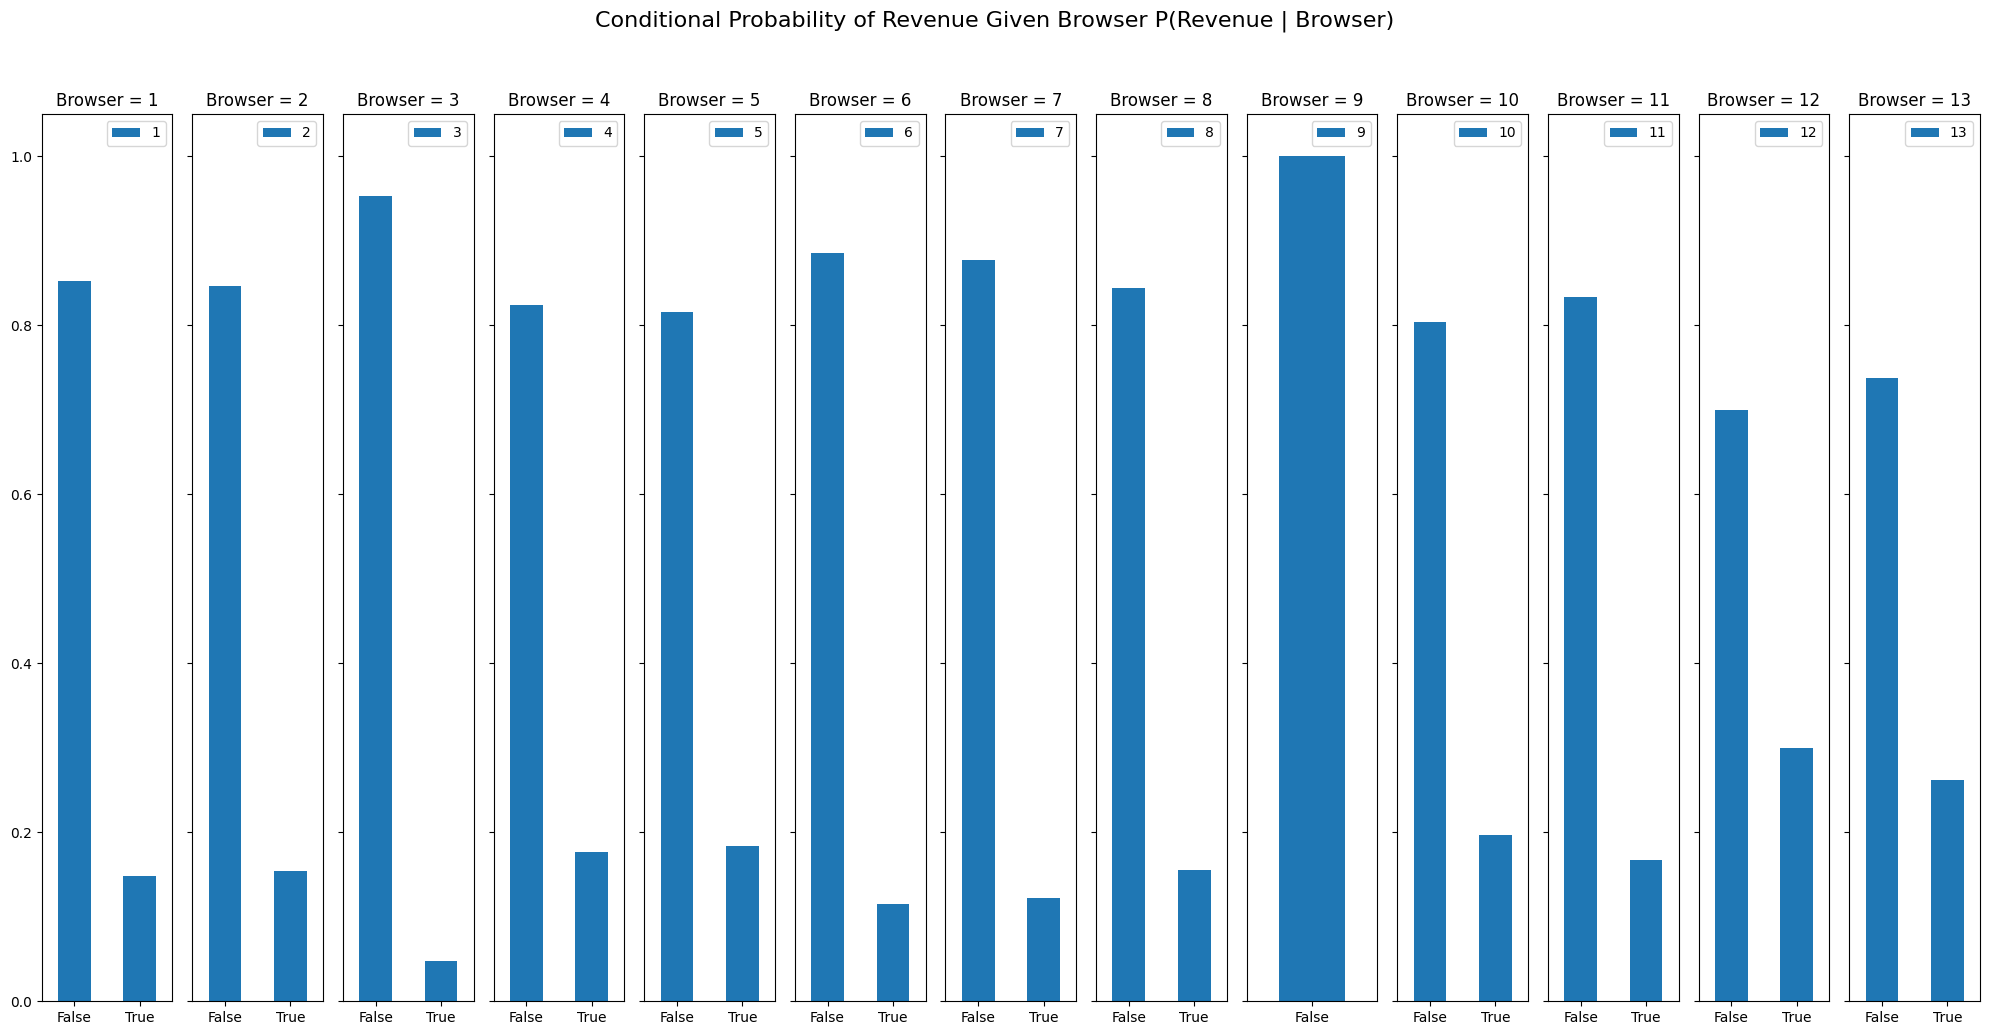

In [16]:
conditional_probability("Browser")

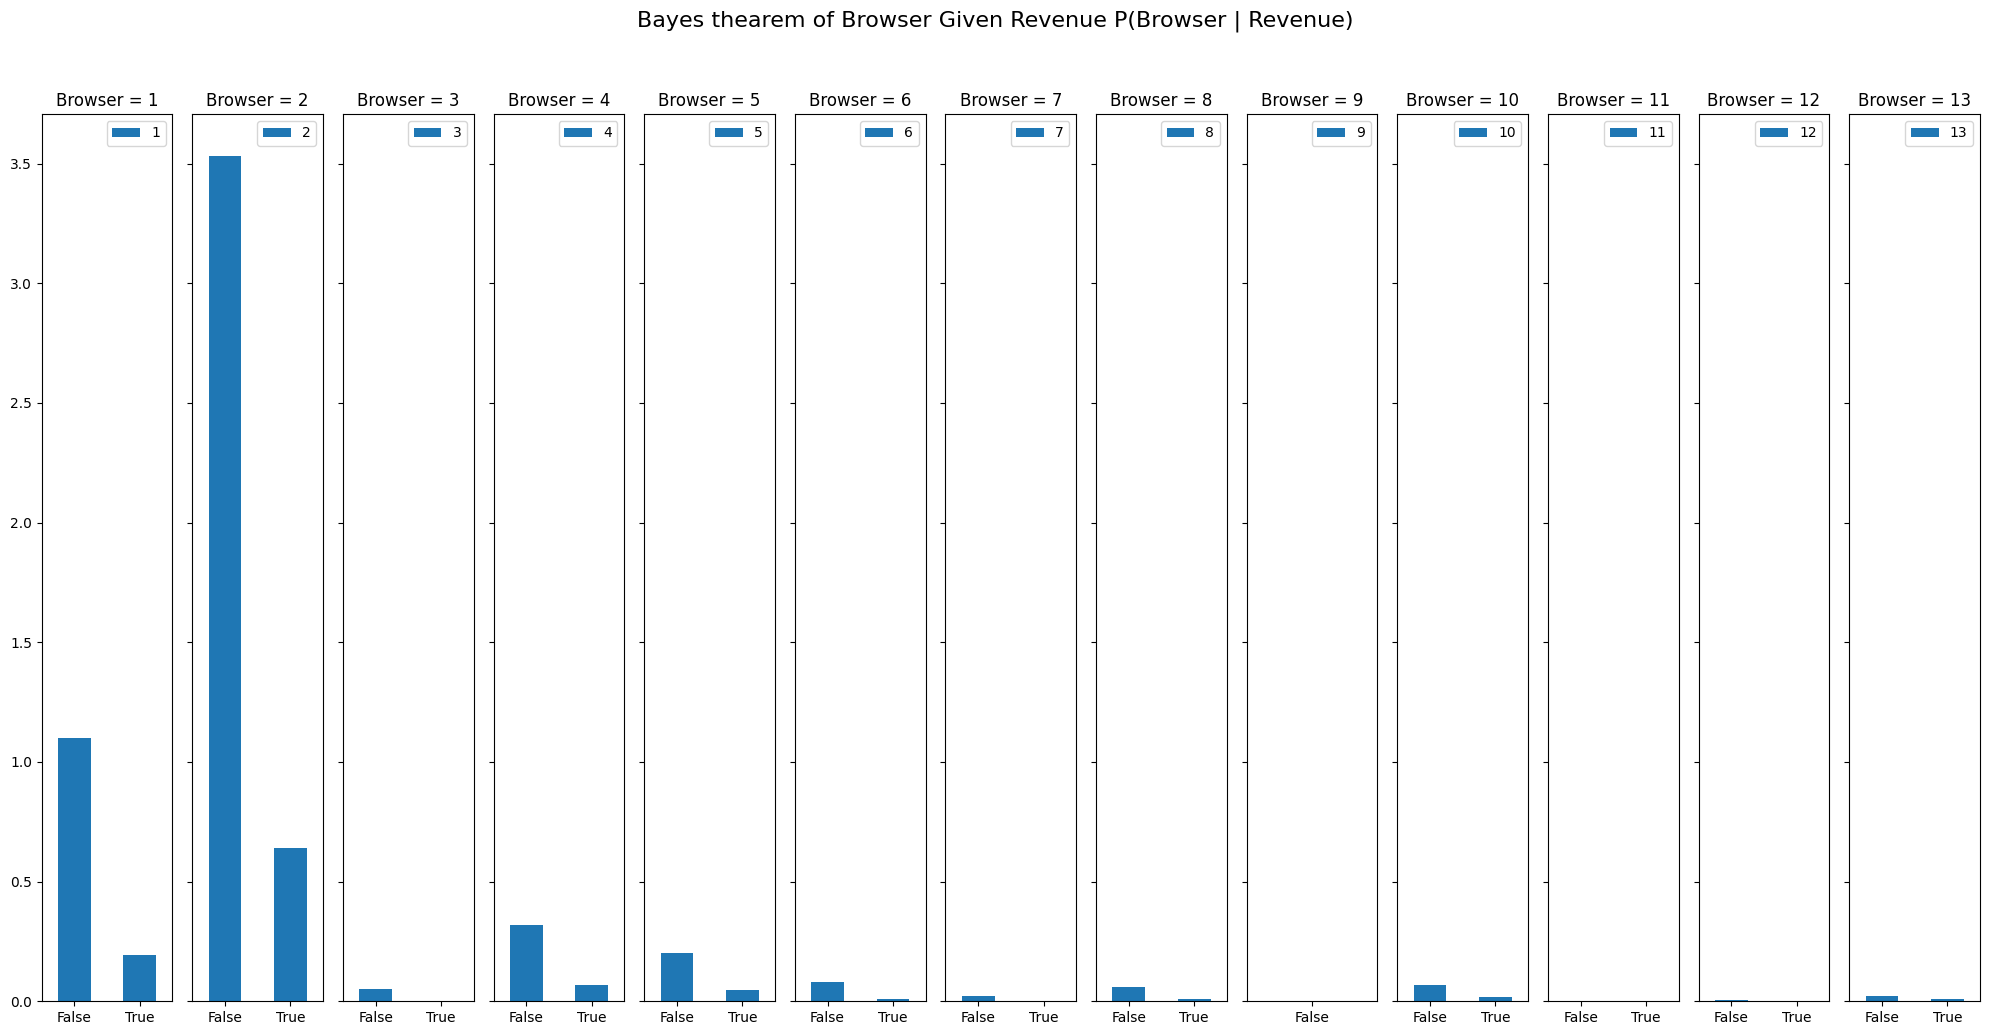

In [17]:
bayes_theorem('Browser')

- Revenue has similar chances for each Region.
- Region 1 has the highest chance given revenue.

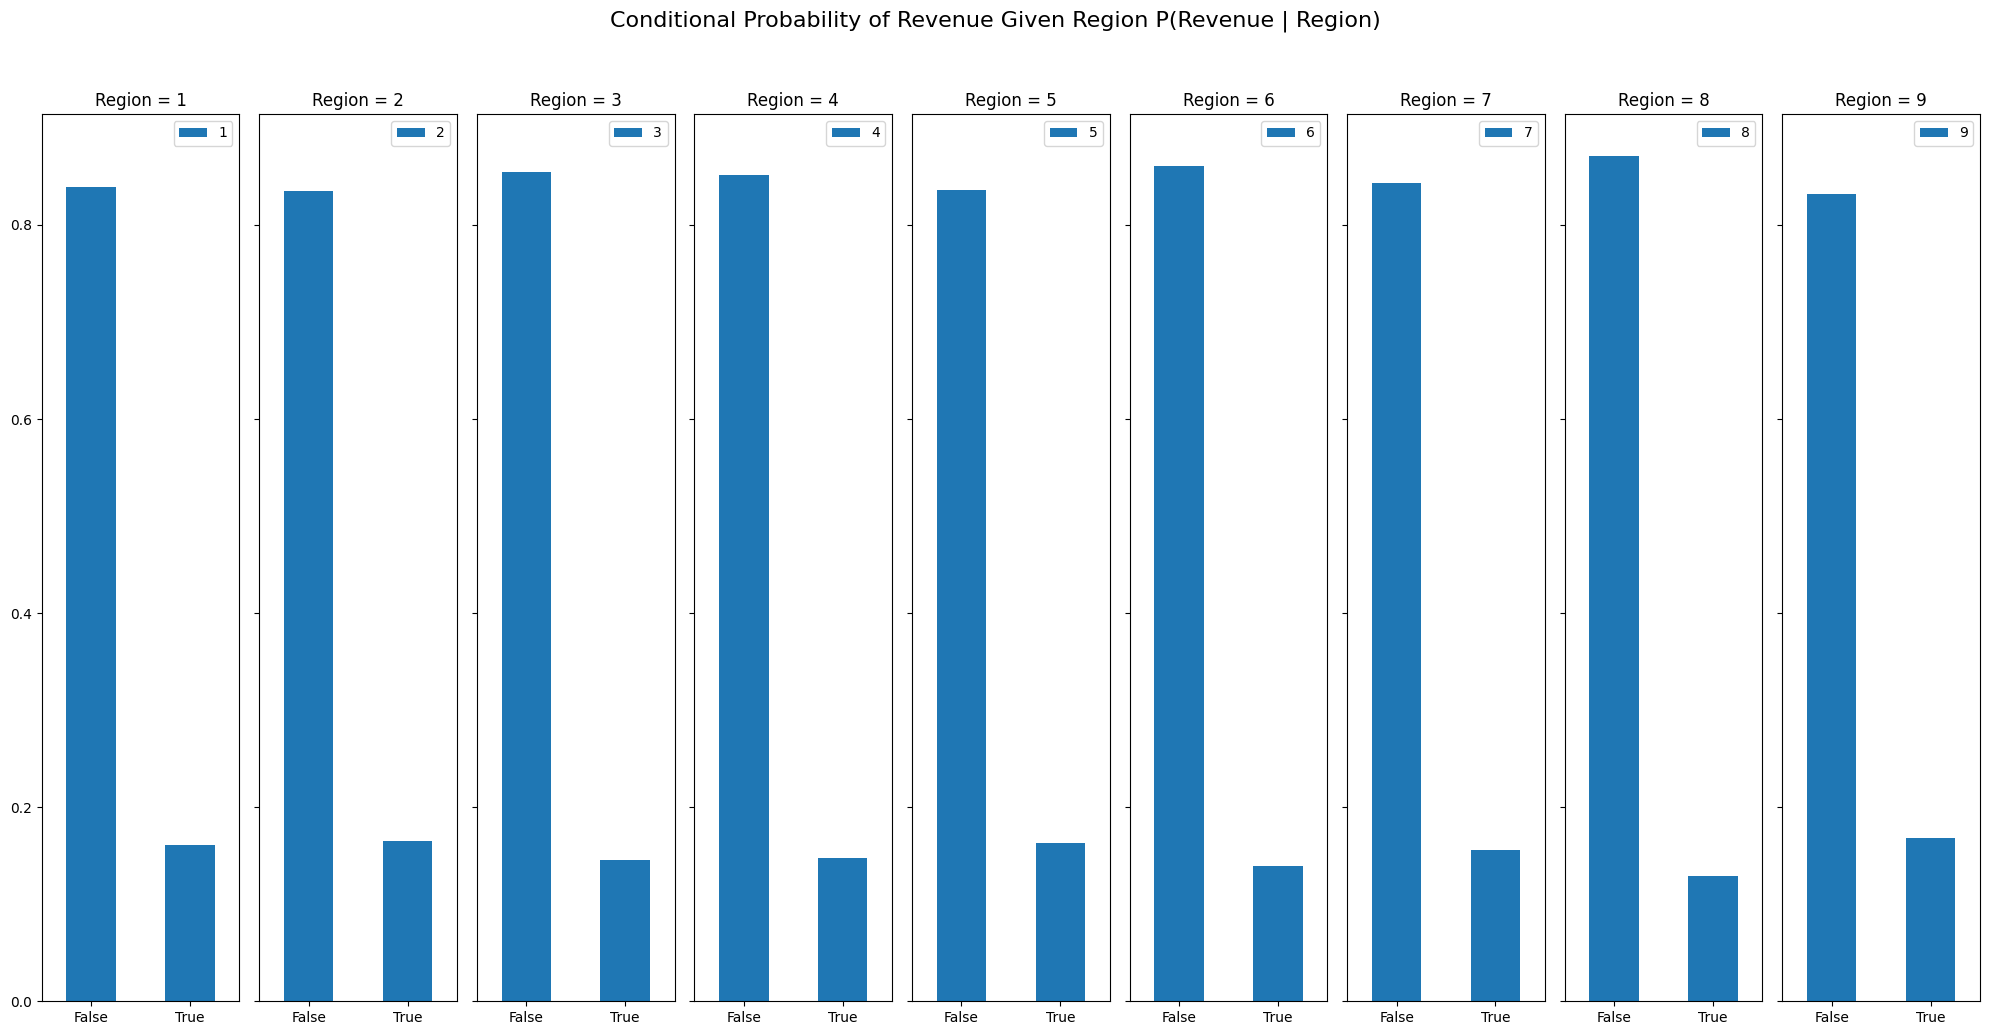

In [18]:
conditional_probability('Region')

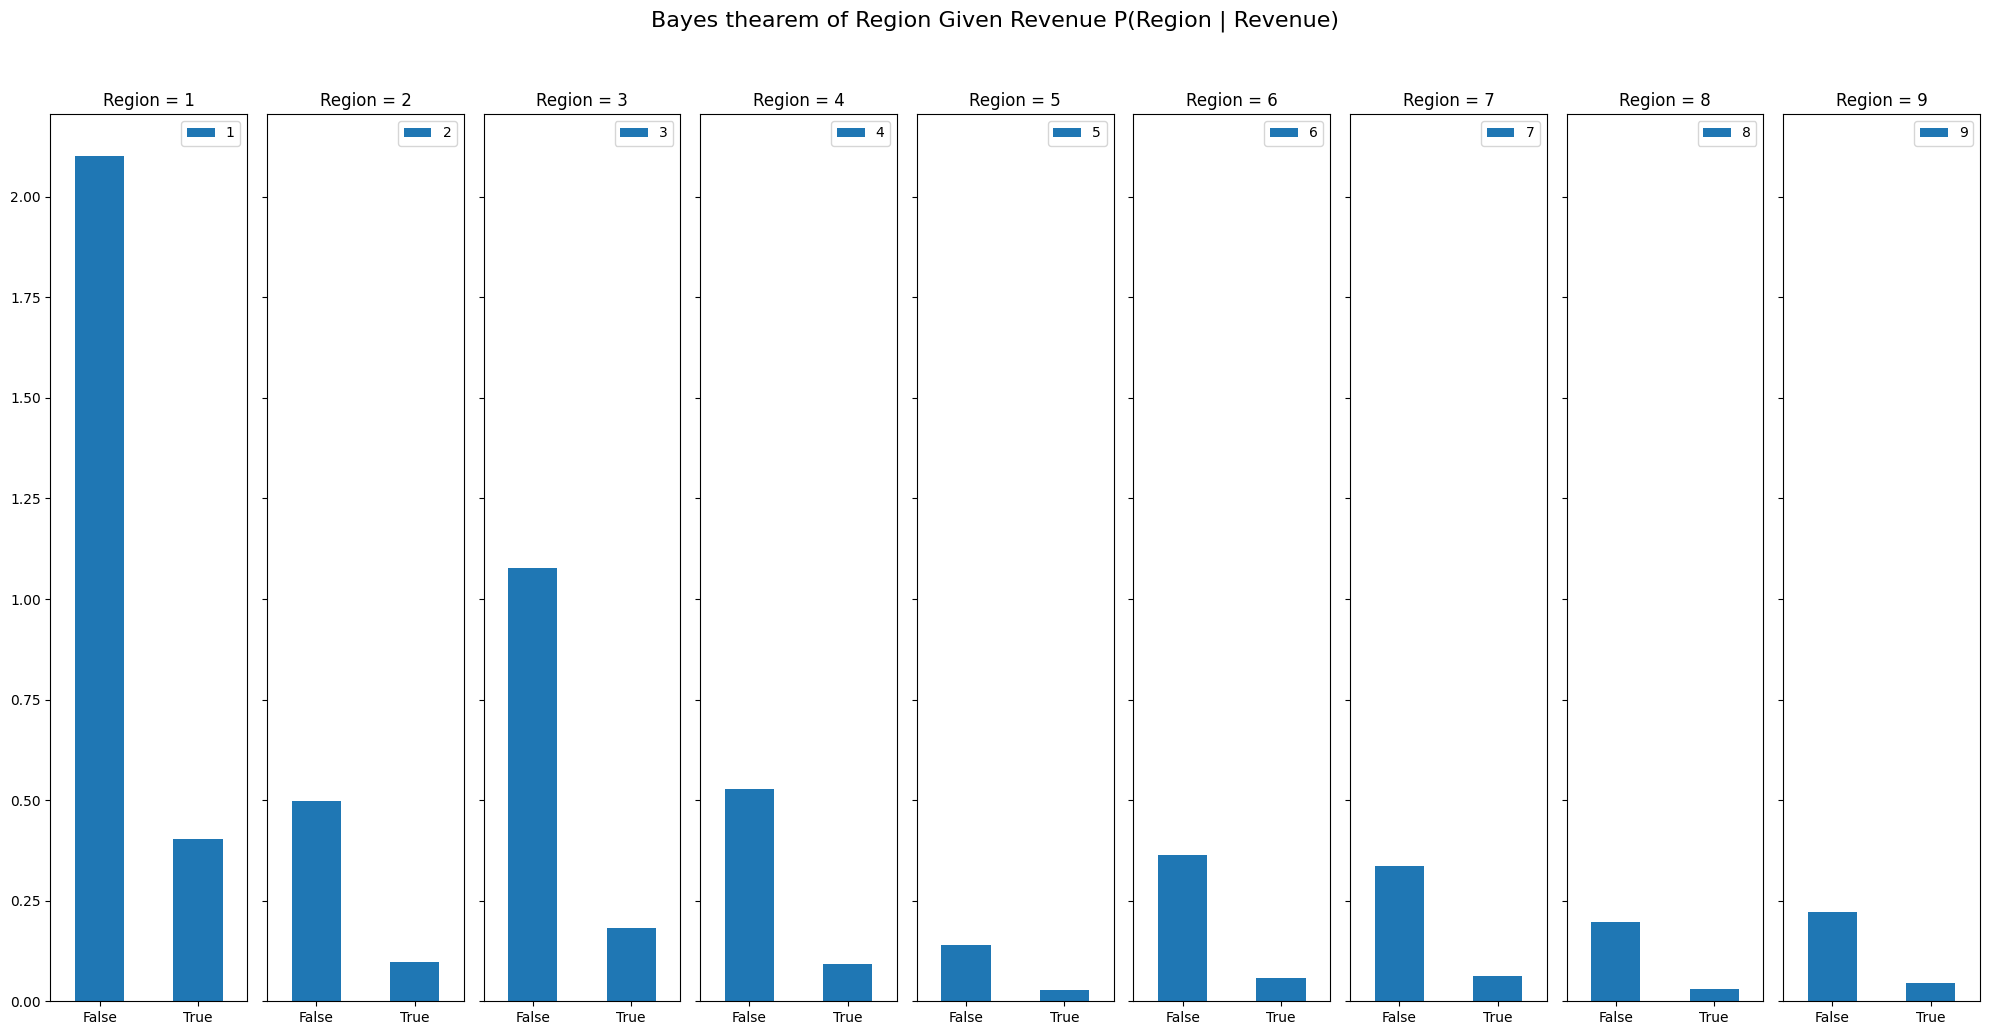

In [19]:
bayes_theorem('Region')

- Revenue has similar chances for each Operating System.
- Operating System 2 has the highest chance given revenue.

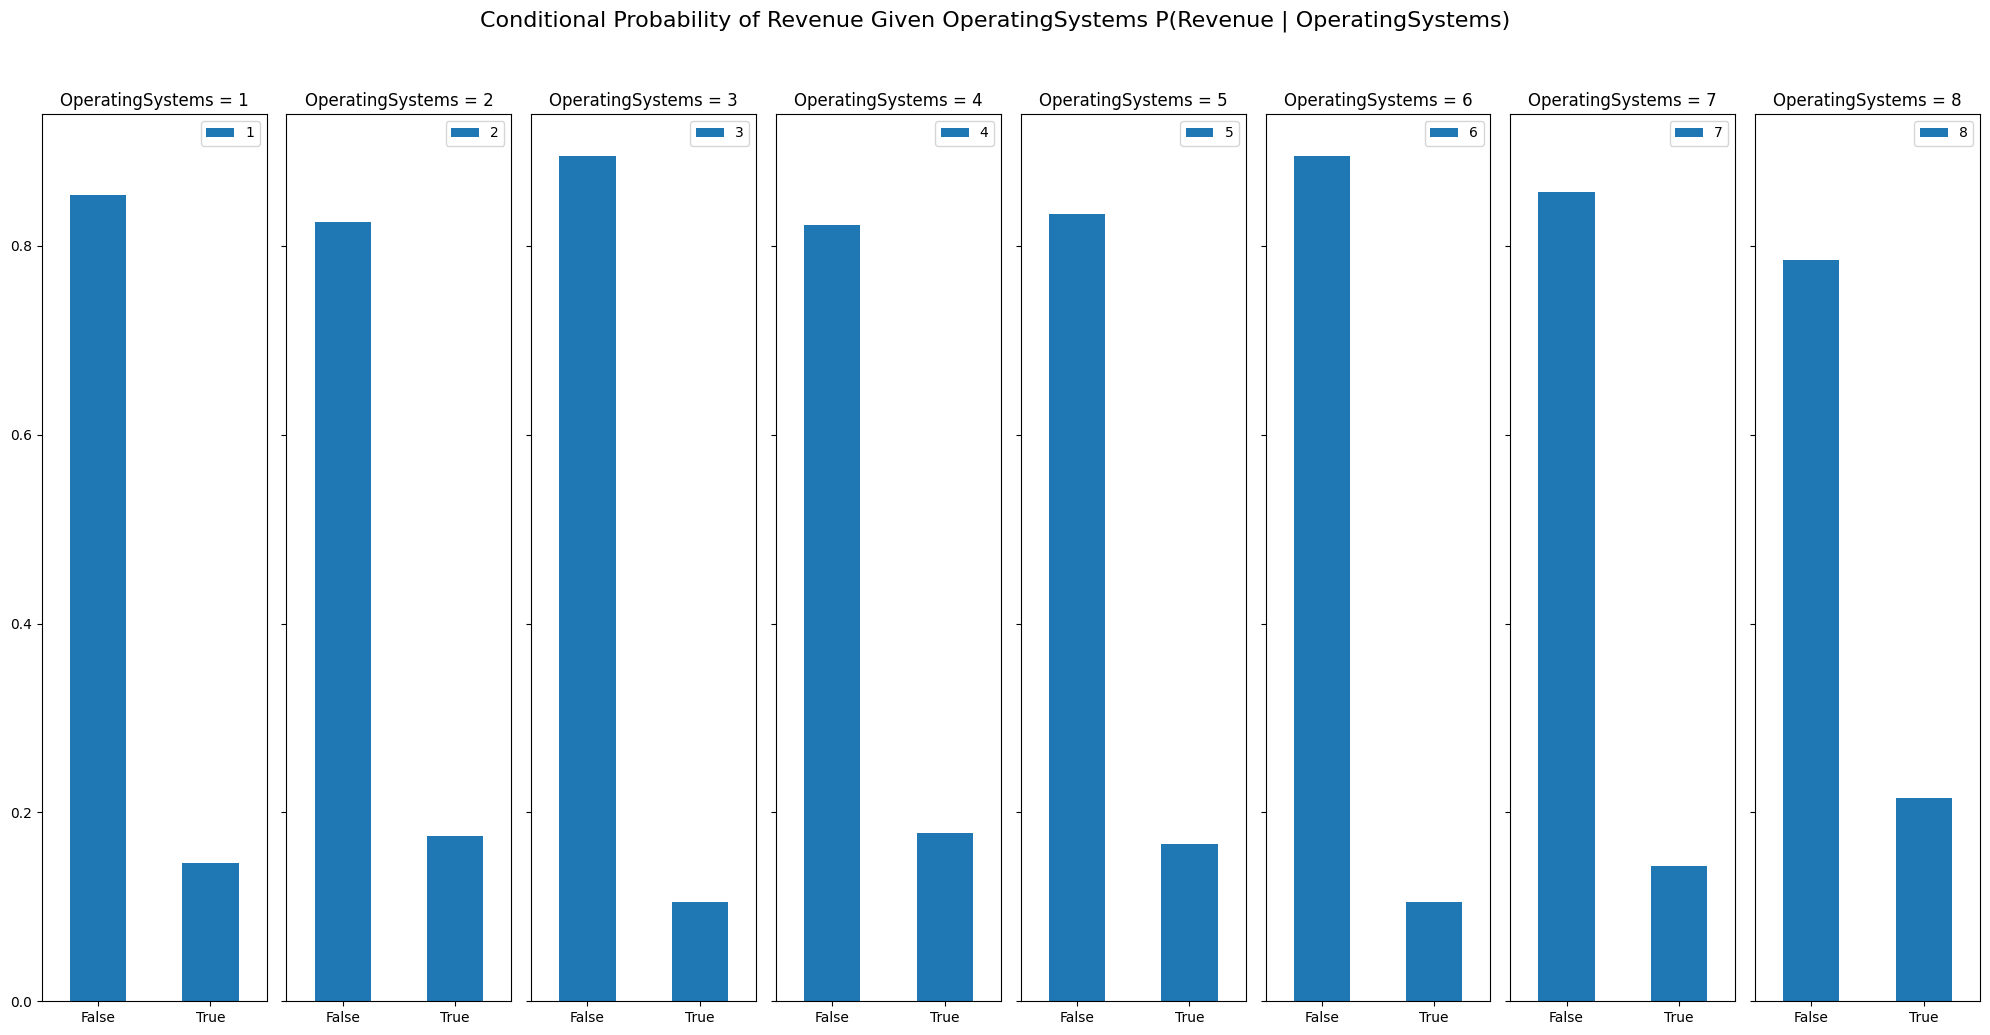

In [20]:
conditional_probability('OperatingSystems')

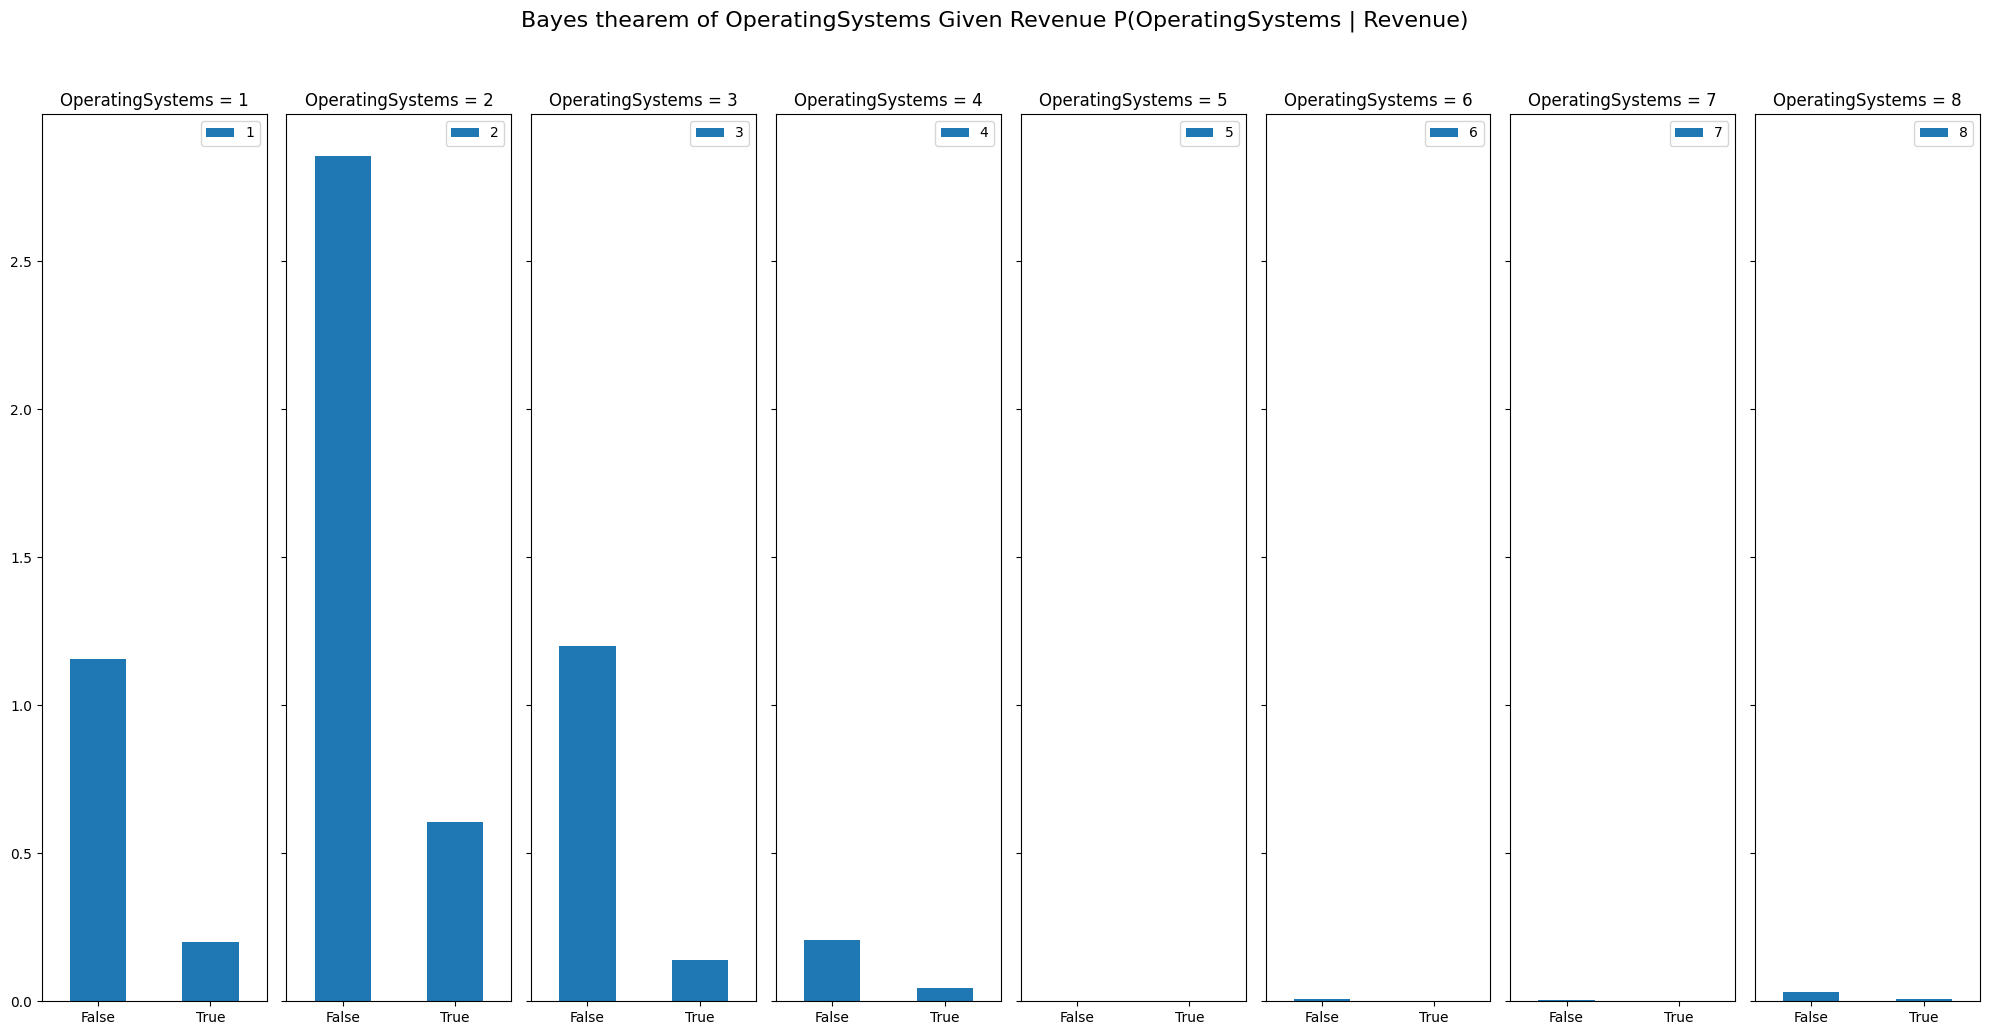

In [21]:
bayes_theorem('OperatingSystems')

- Revenue has Zero chances when those 12, 15, 17 and 18 Traffic Types are used.
- Traffic Type 2 has the highest chance given Revnue

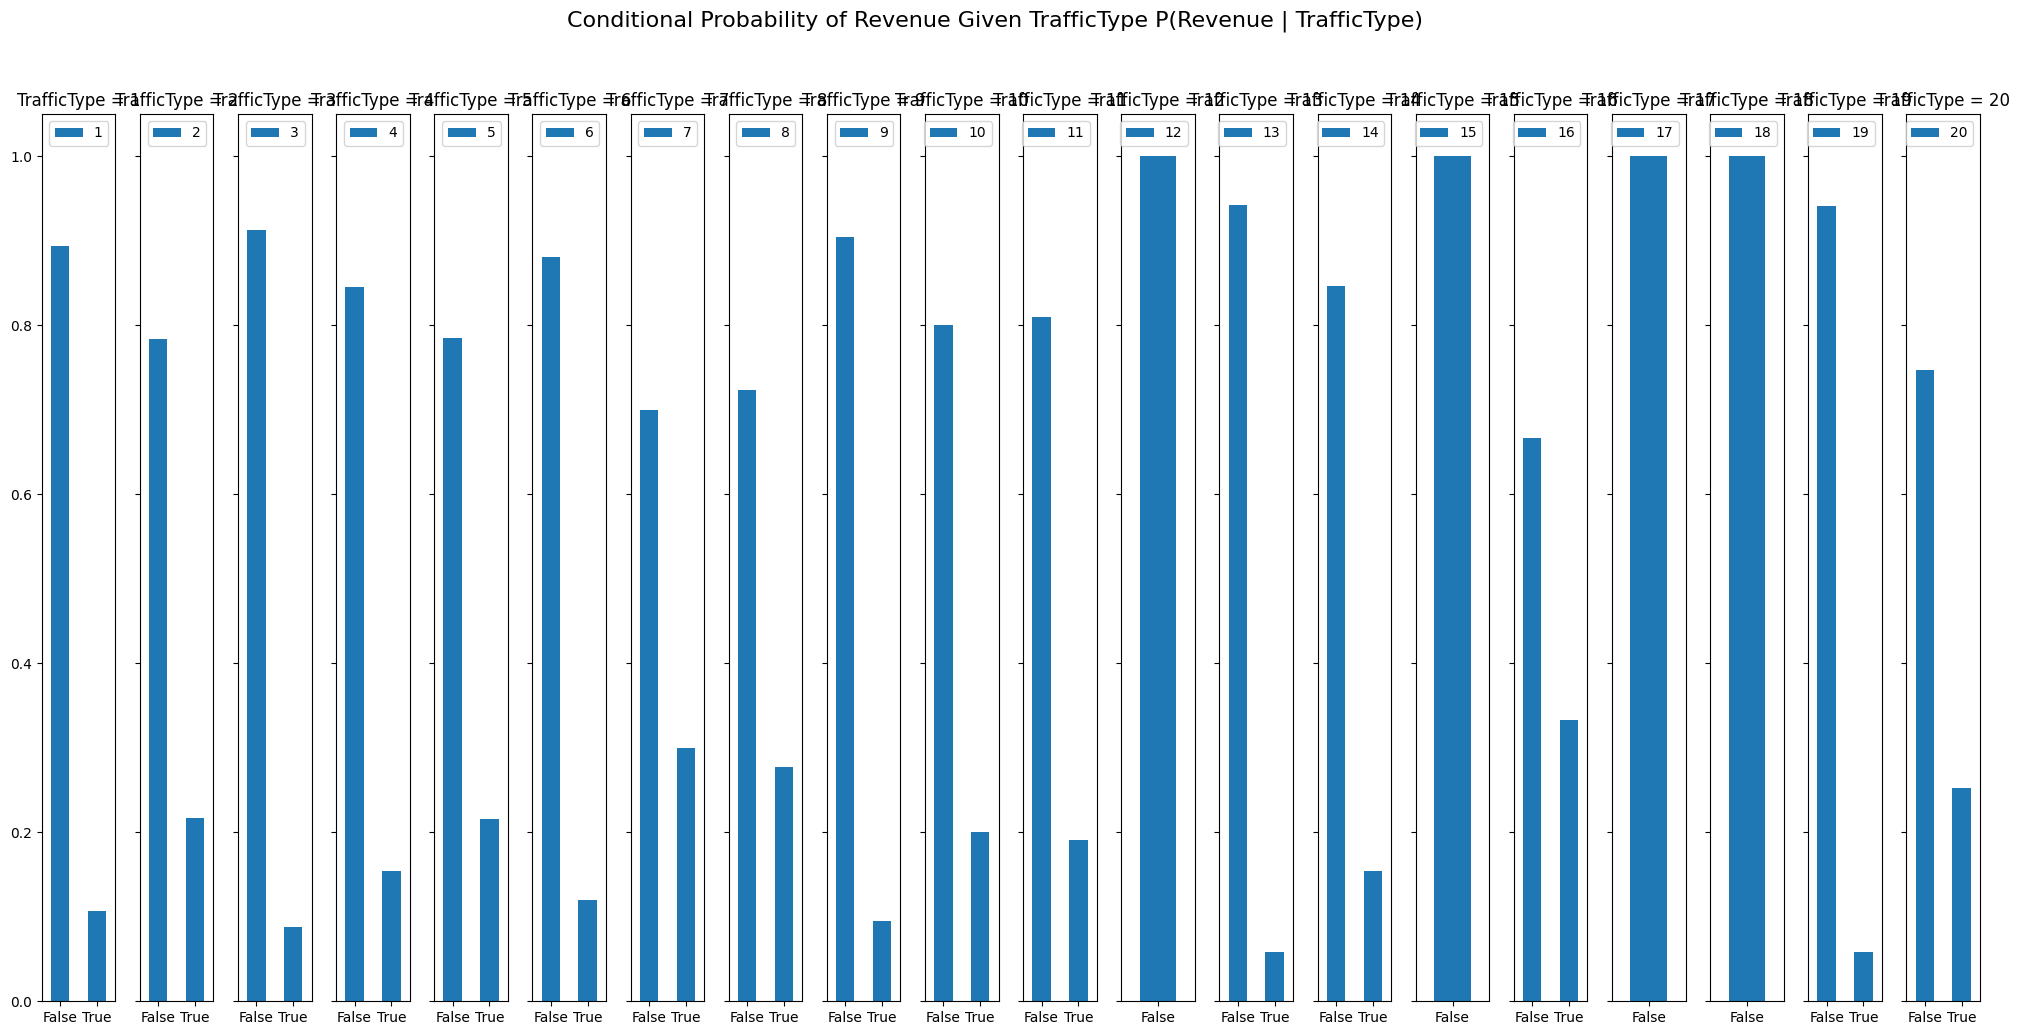

In [22]:
conditional_probability('TrafficType')

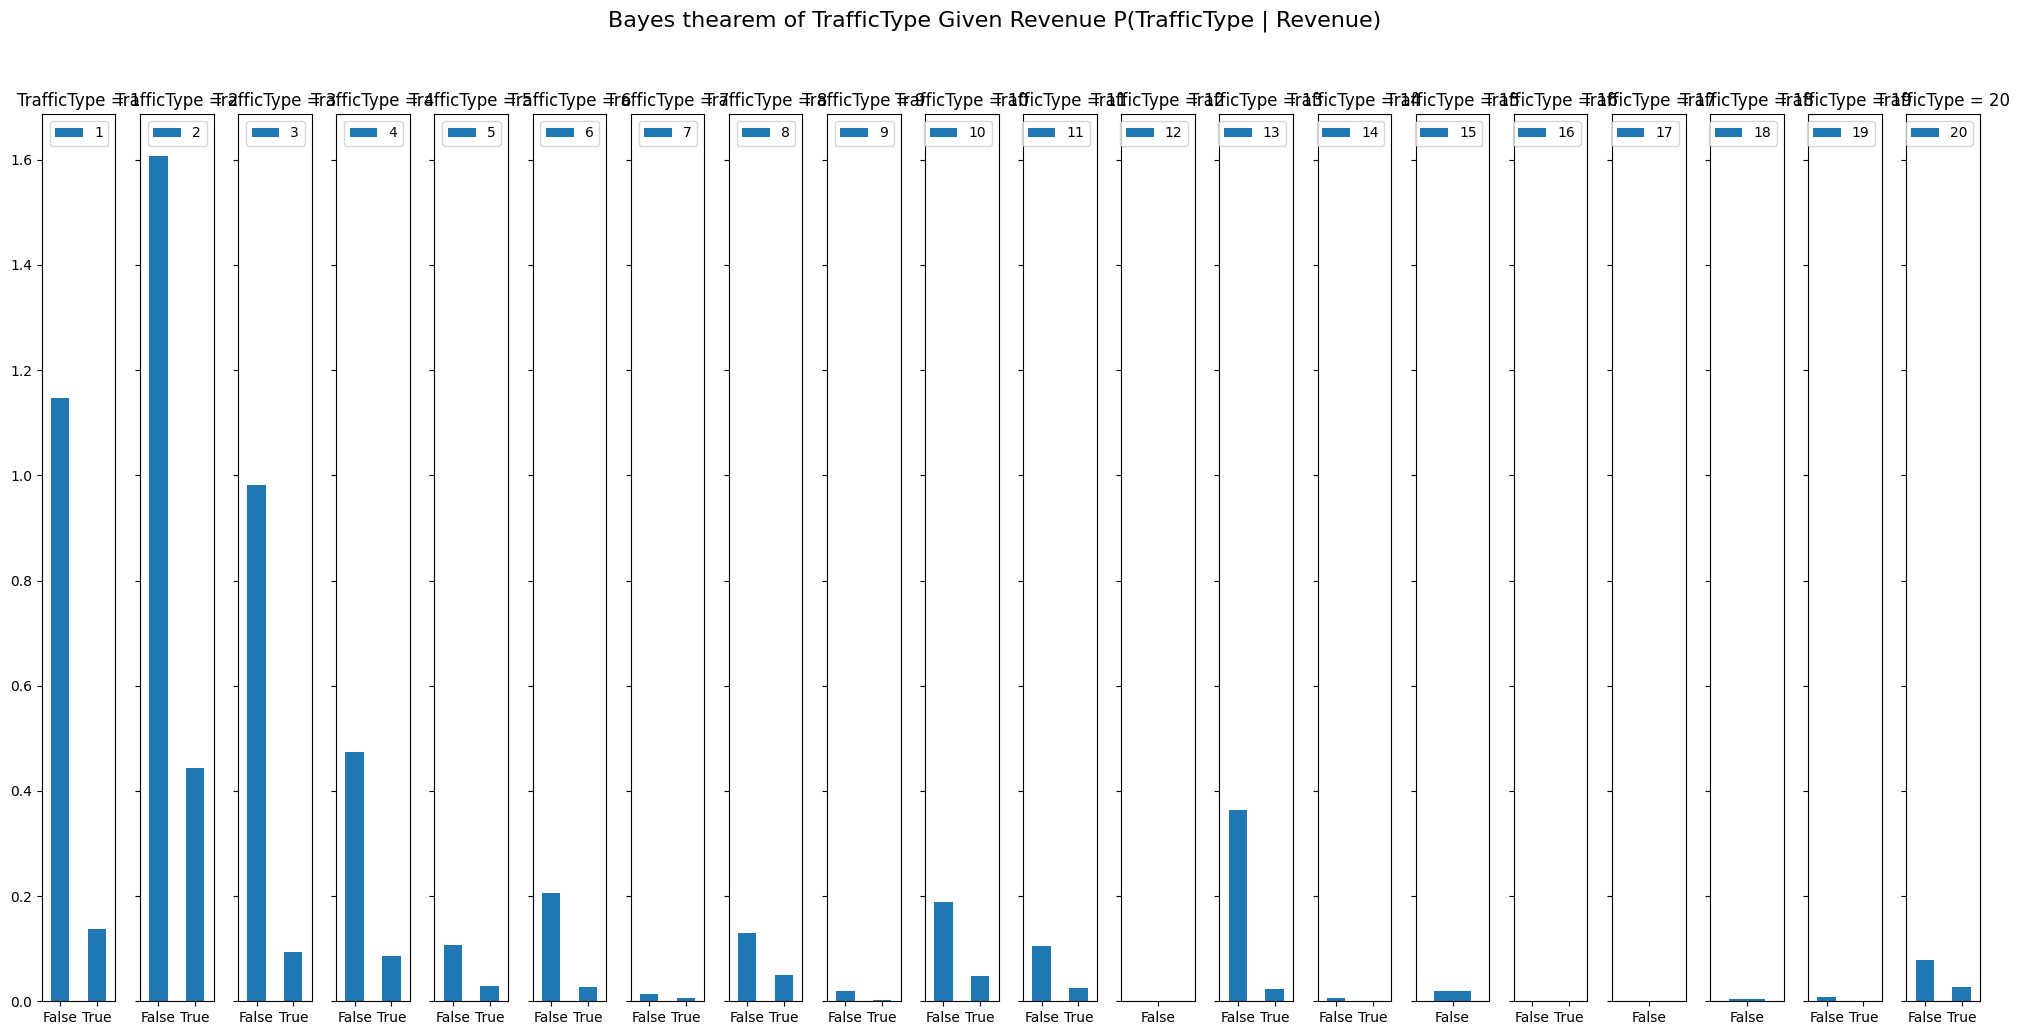

In [23]:
bayes_theorem('TrafficType')

- Special Day value 0.0 has the top chance given revenue and also revenue has higher chances given value 0.0

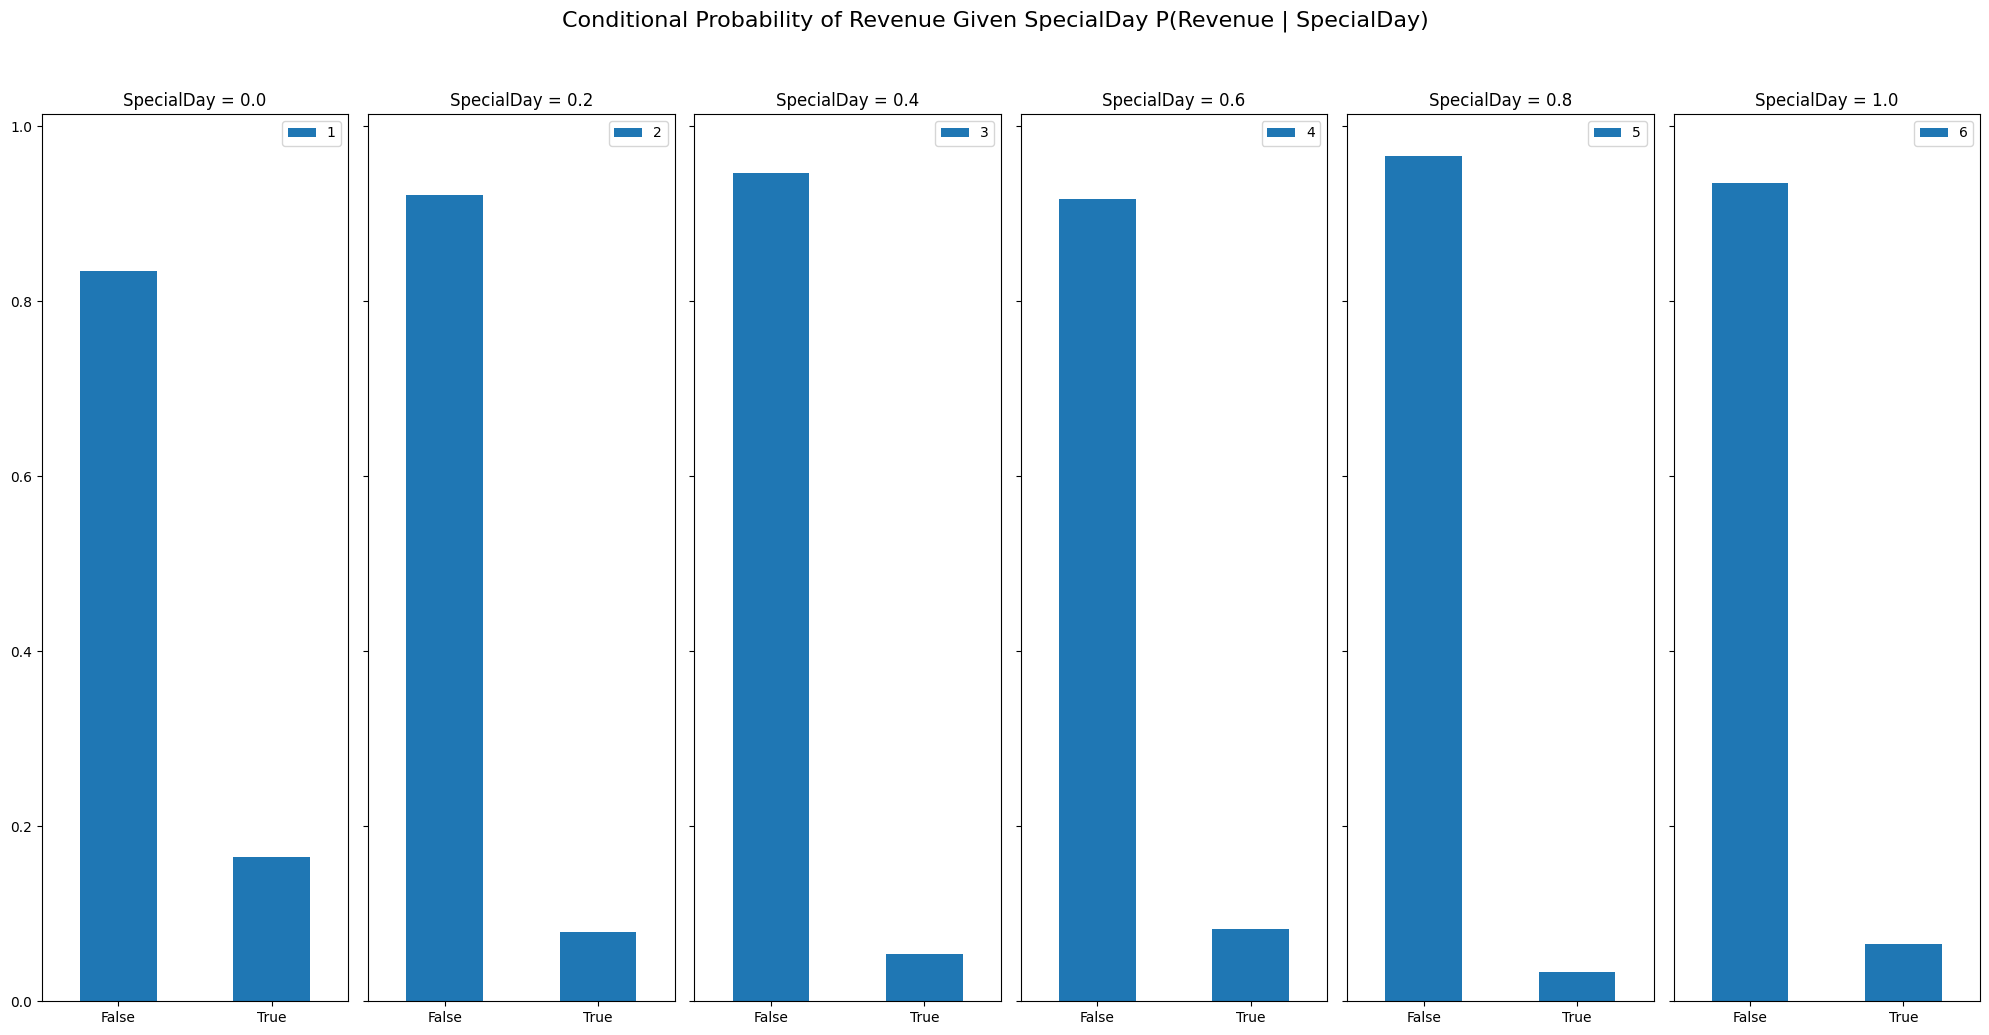

In [25]:
conditional_probability('SpecialDay')

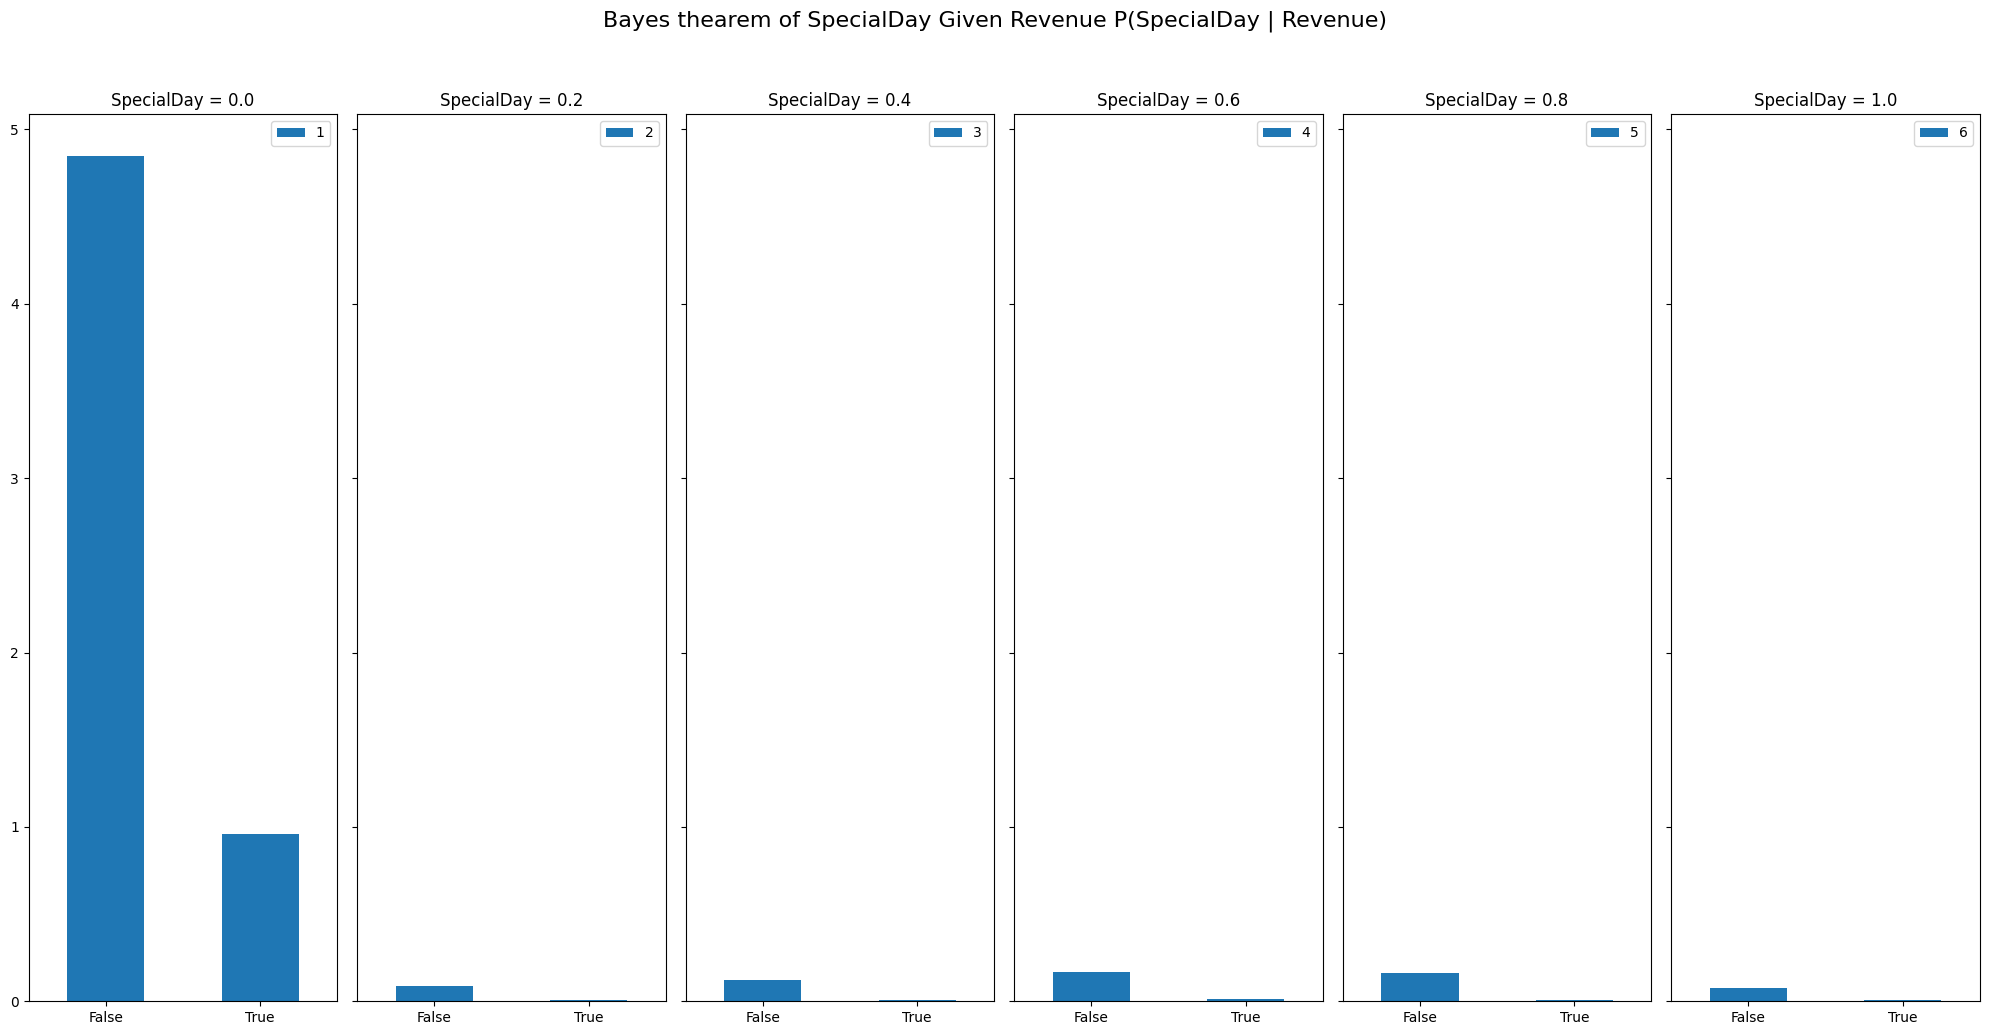

In [26]:
bayes_theorem('SpecialDay')

- November has the highest month of getting revenue. 

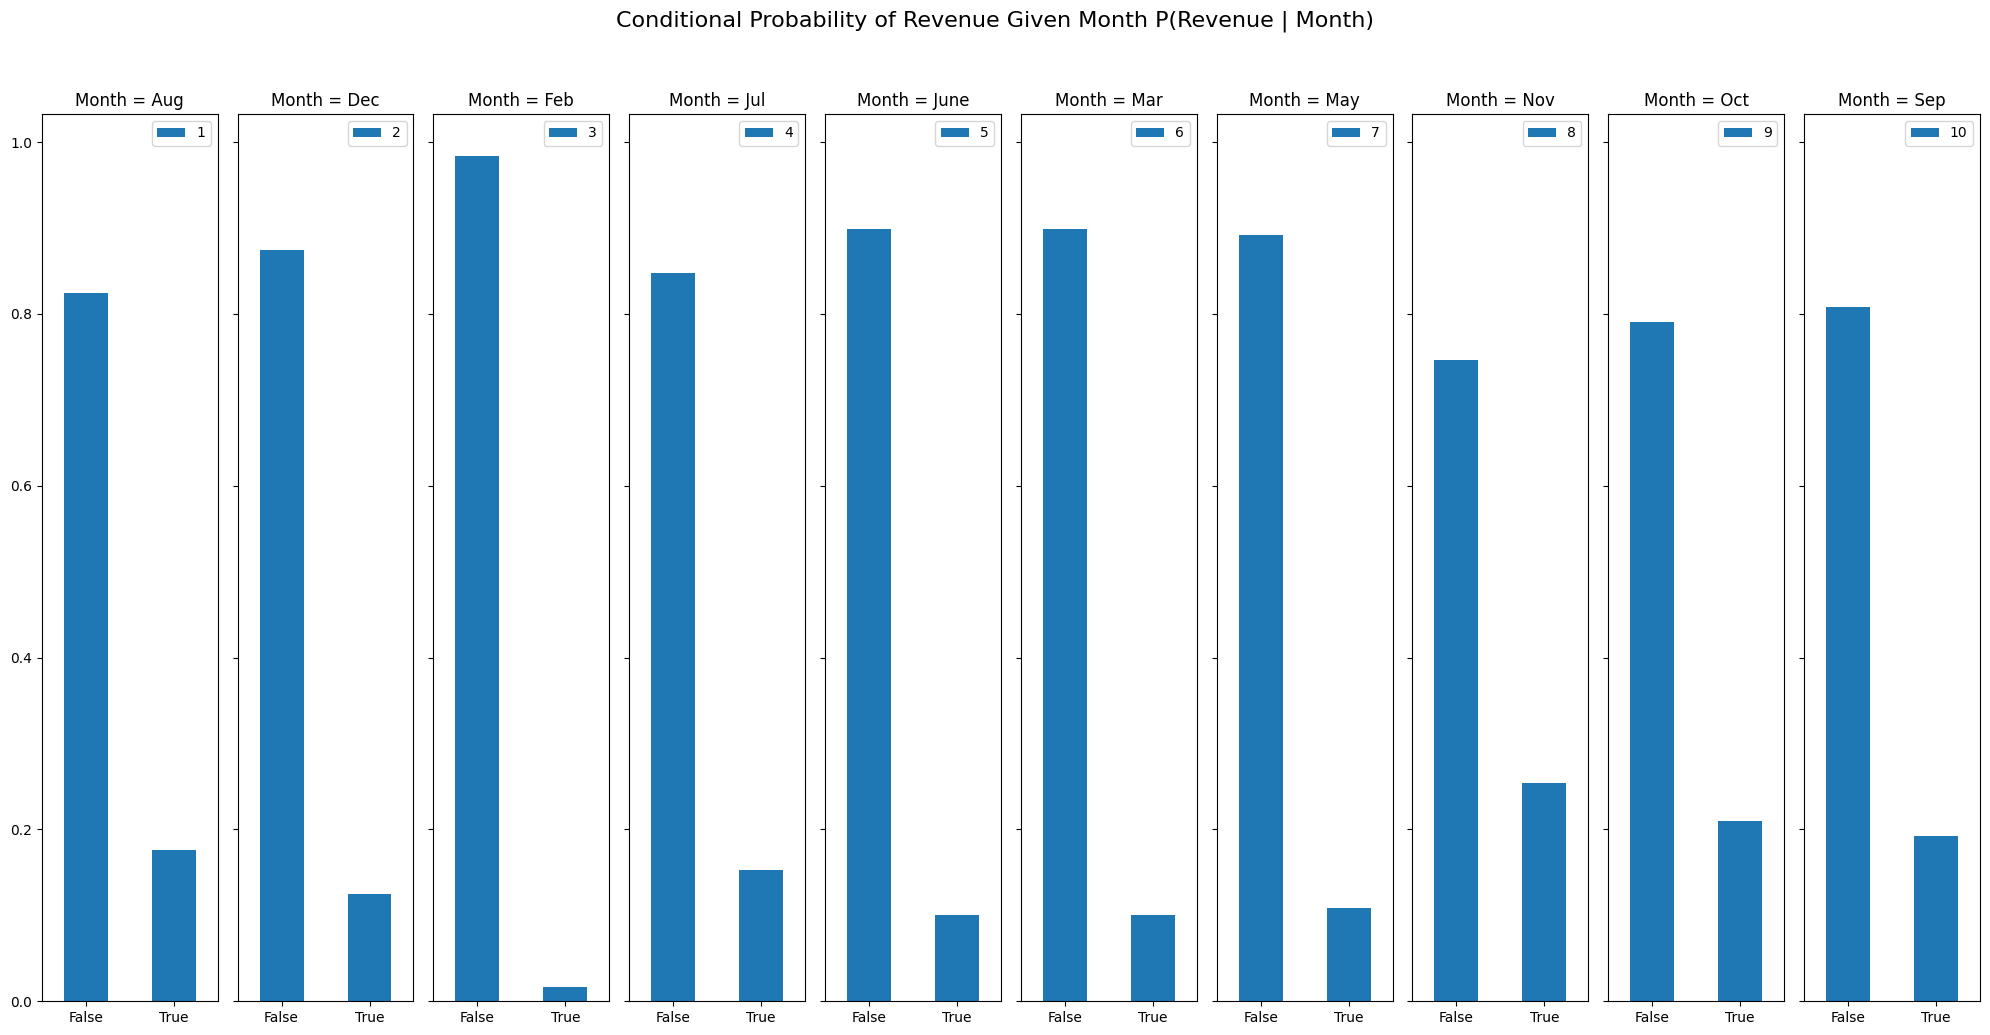

In [27]:
conditional_probability('Month')

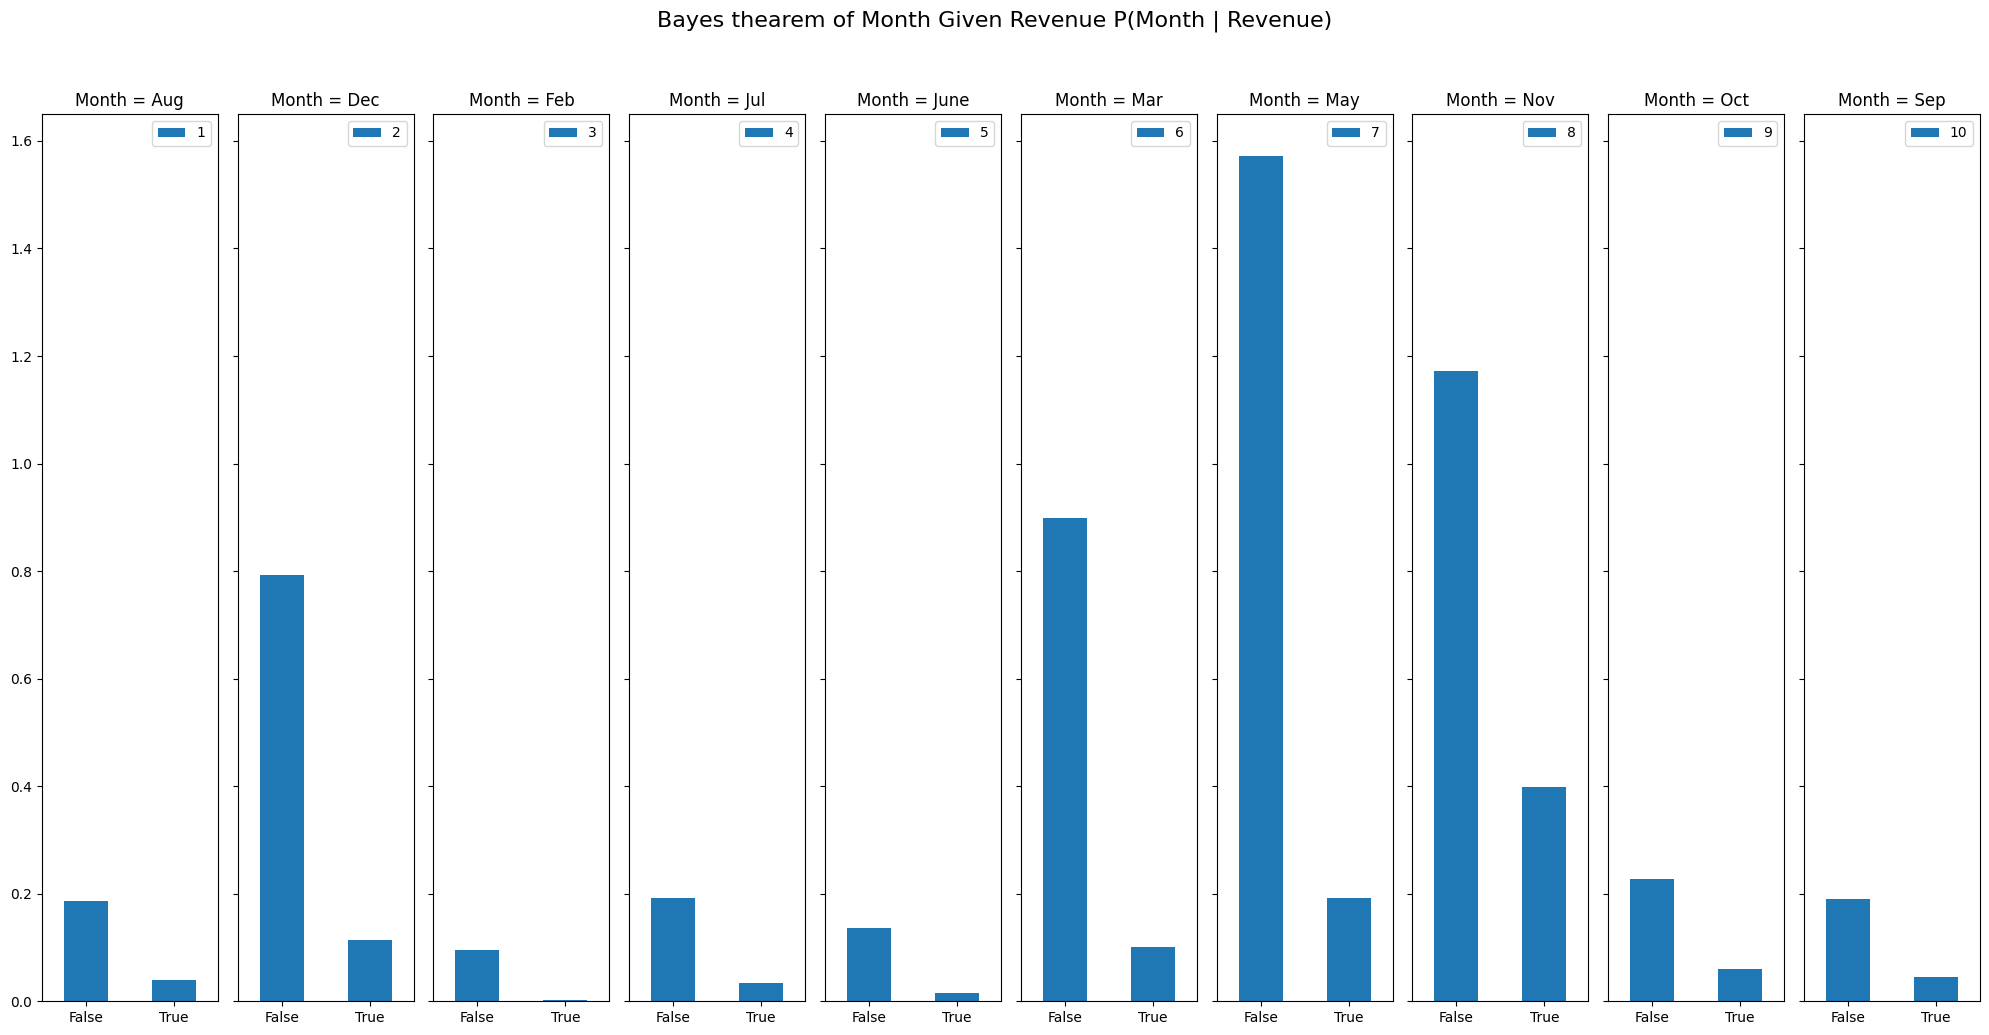

In [28]:
bayes_theorem('Month')

- Revenues have higher chances to happen when the Visitor is New Visitor.
- The user has higher chances of being Returning Visitor if he is revenued.

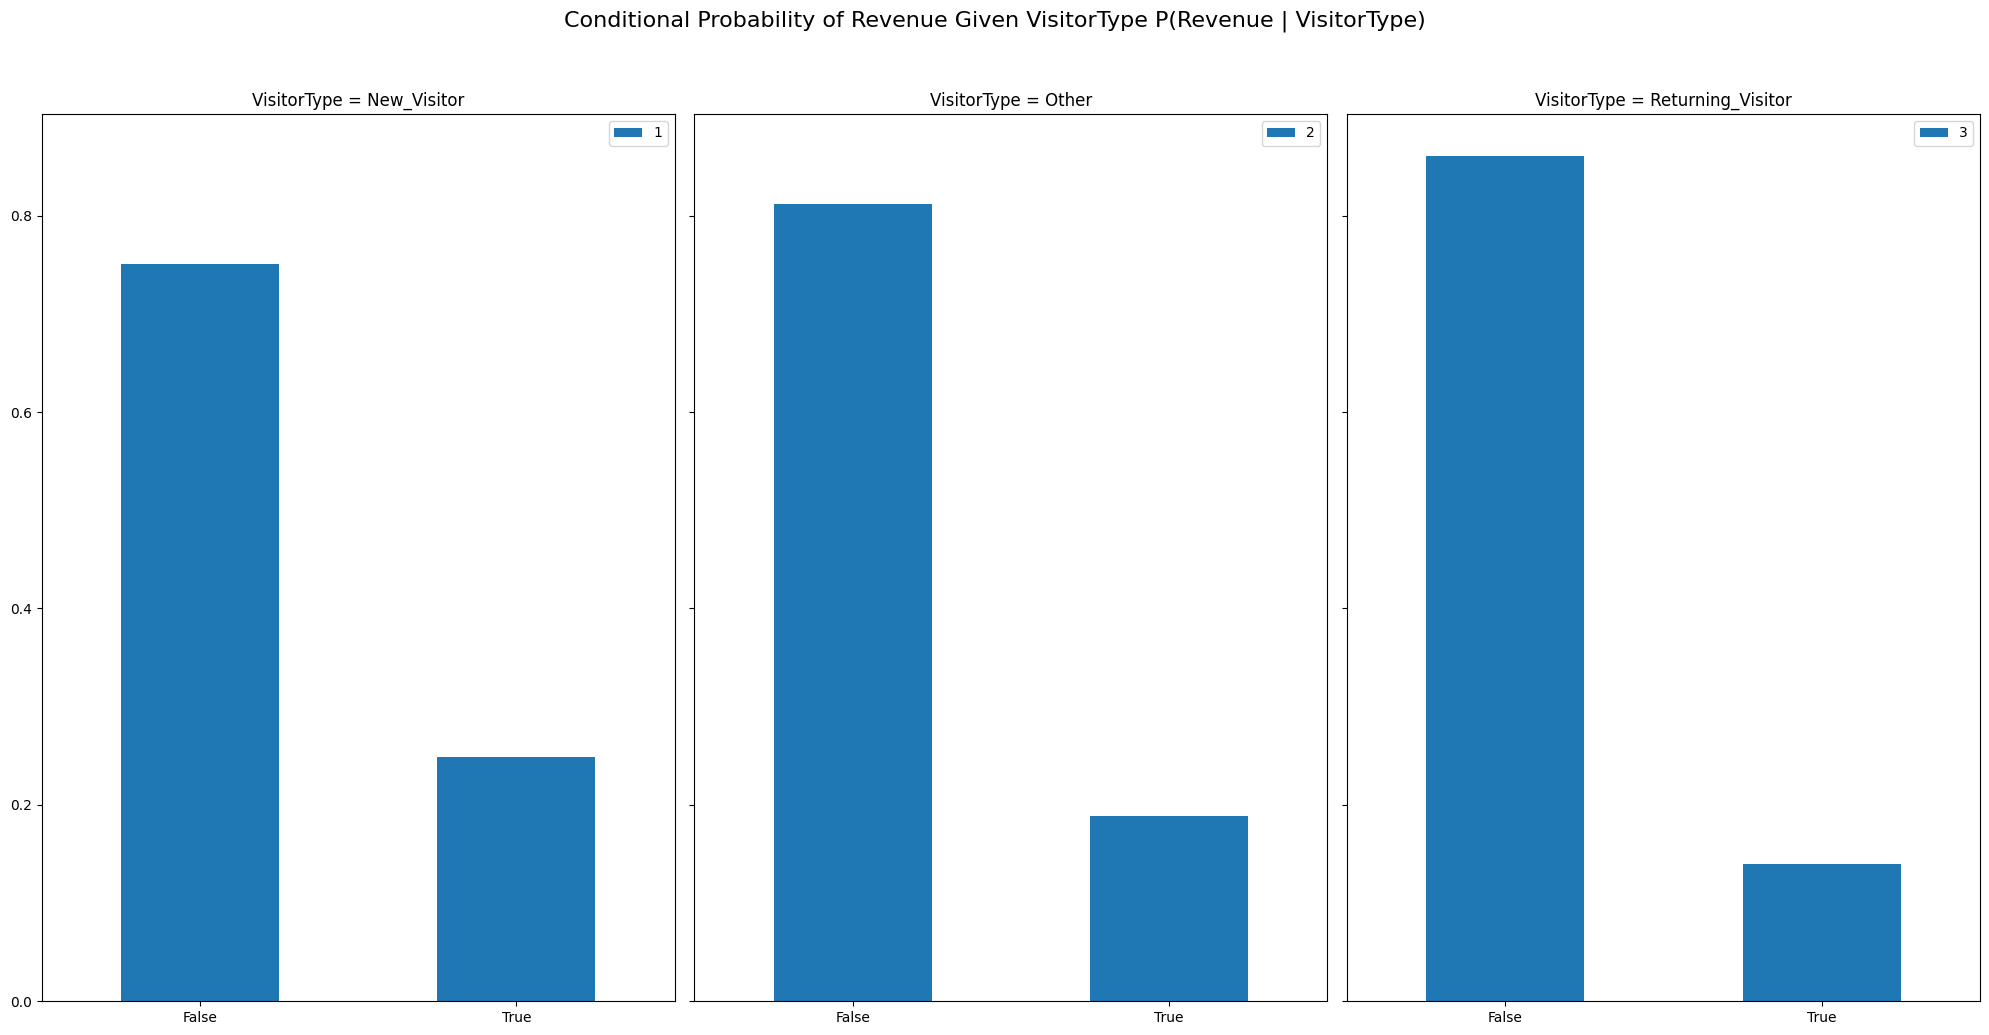

In [29]:
conditional_probability('VisitorType')

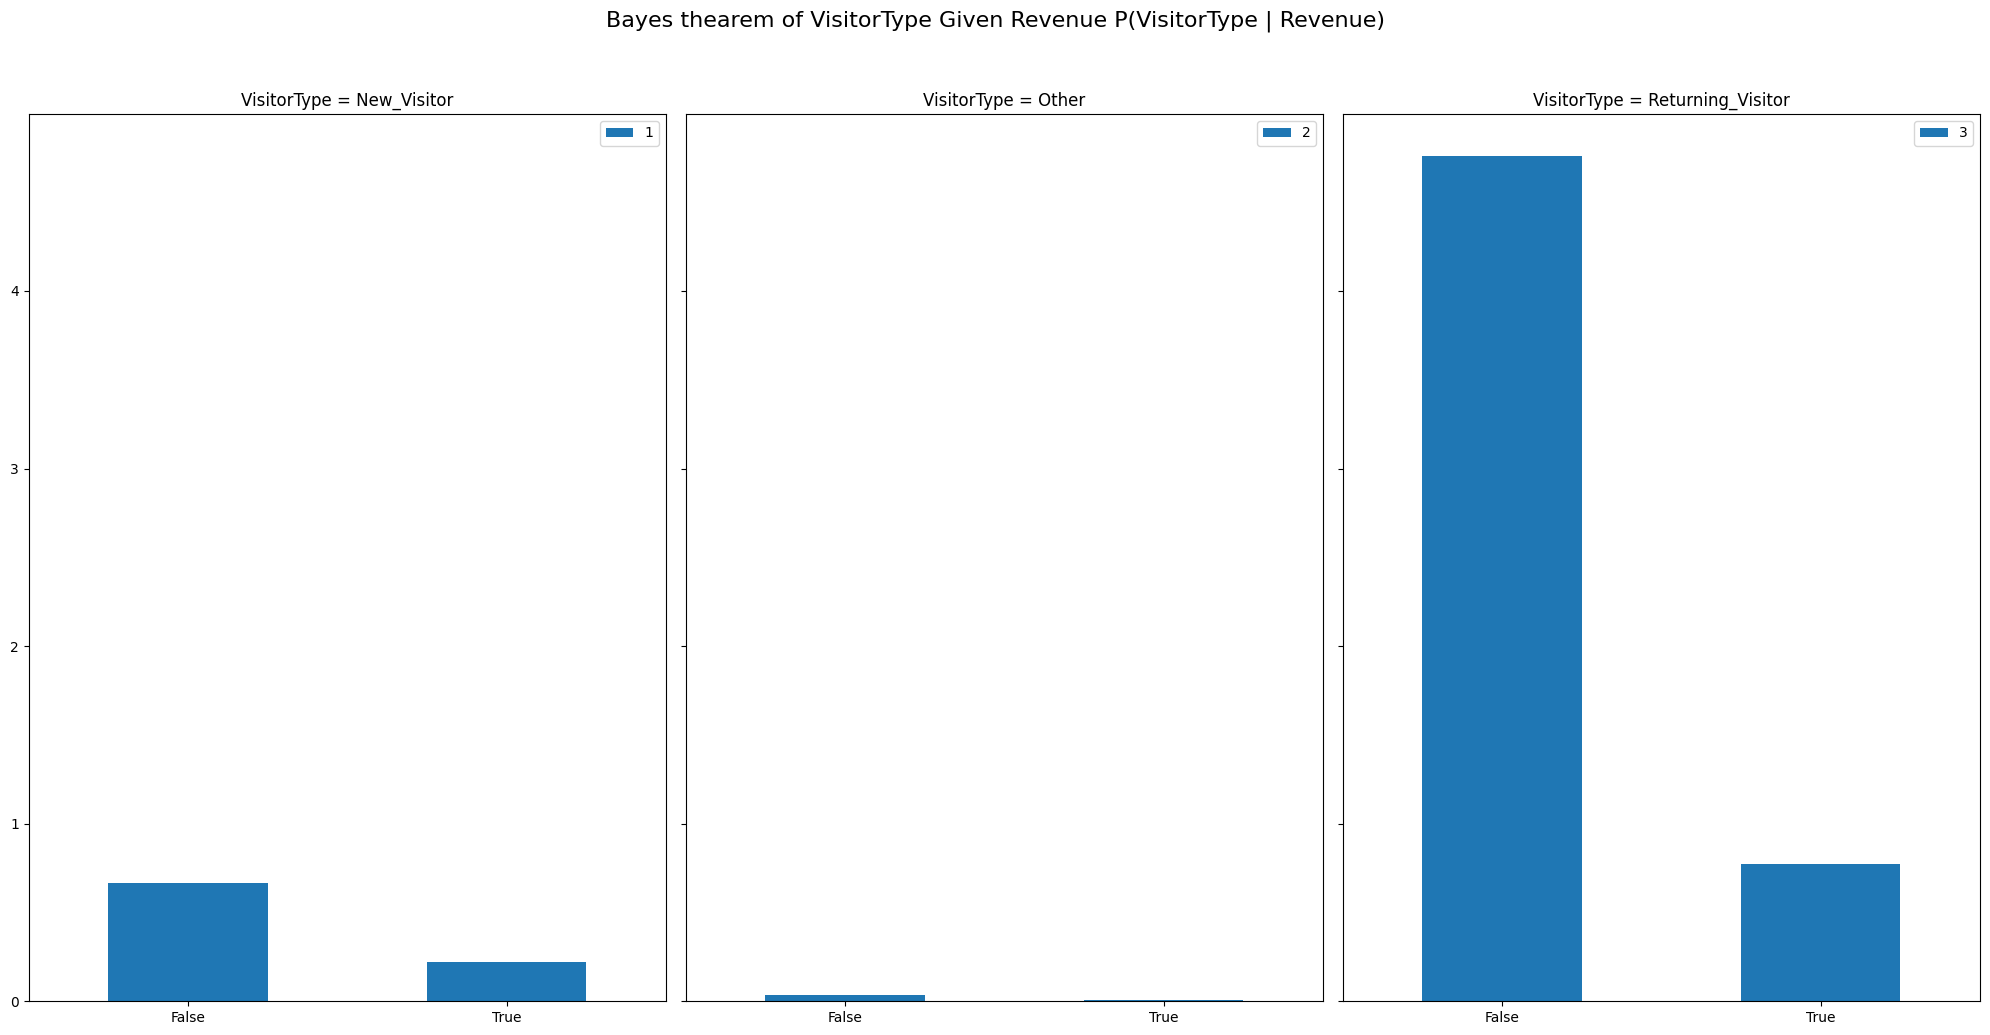

In [30]:
bayes_theorem('VisitorType')